In [1]:
#spreading.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#simulate the viscous radial spreading of an initially narrow circular ringlet

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity

r.shape =  (201, 15, 3)
total_ring_mass =  1e-10
shear_viscosity =  1e-11


In [4]:
print radial_width, total_ring_mass, shear_viscosity
print a.min(), a.max(), e.min(), e.max()

0.003 1e-10 1e-11
0.9891842431015969 1.0158897335236057 5.746736420064735e-12 7.1443810996362885e-06


In [5]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*shear_viscosity)
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale

viscous_timescale =  75000.0


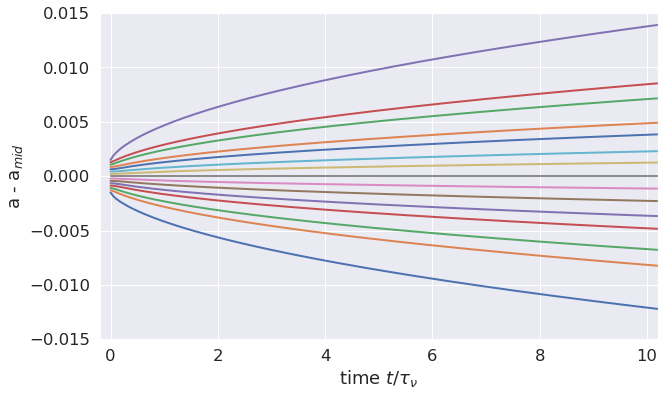

In [6]:
#plot r(theta)
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
a_avg = a.mean(axis=2)                    #average a across longitude
for pidx in range(number_of_streamlines):
    da = a_avg[:, pidx] - a_avg[:, number_of_streamlines/2]
    p = ax.plot(times_viscous, da, linestyle='-', linewidth=2)
#ax.set_xlim(-0.05, 1.05)
yrng = 0.015
ax.set_ylim(-yrng, yrng)
ax.set_xlim(-0.2, 10.2)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('a - a$_{mid}$')

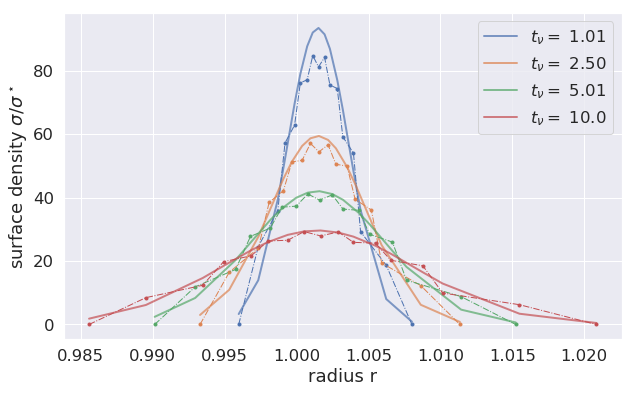

In [7]:
#plot sigma(r) at selected times
tidxs = [19, 47, 94, 189]
R = r[0].mean()
sd_init = total_ring_mass/np.pi/(R**2)
f, ax = plt.subplots(figsize=(10, 6))
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
for idx in range(len(tidxs)):
    tidx = tidxs[idx]
    r_mean = r[tidx].mean(axis=1)
    dr_in = r_mean[1] - r_mean[0]
    dr_out = r_mean[-1] - r_mean[-2]
    r_padded = np.array([r_mean[0] - dr_in] + r_mean.tolist() + [r_mean[-1] + dr_out])
    x = r_padded/R
    tau = 12.0*shear_viscosity*times[tidx]/(R**2)
    arg = ((x - 1)**2)/tau
    sd_exp = np.exp(-arg)/(x**0.75)/np.sqrt(2*twopi*tau)
    lbl = r'$t_\nu=$ ' + str(times_viscous[tidx])[0:4]
    ax.plot(r_padded, sd_exp, linestyle='-', linewidth=2, alpha=0.7, color=colors[idx], label=lbl)
    r_2D = r[tidx]
    t_2D = t[tidx]
    delta_r = delta_f(r_2D, t_2D)
    sd_2D = surface_density(lambda0, delta_r)
    r_1D = r_2D.mean(axis=1)
    sd_1D = sd_2D.mean(axis=1)
    dr_in = r_1D[1] - r_1D[0]
    dr_out = r_1D[-1] - r_1D[-2]
    r_padded = np.array([r_1D[0] - dr_in] + r_1D.tolist() + [r_1D[-1] + dr_out])
    sd_padded = np.array([0.0] + sd_1D.tolist() + [0.0])
    ax.plot(r_padded, sd_padded/sd_init, marker='o', markersize=3, linestyle='-.', linewidth=1, alpha=1.0, 
        color=colors[idx])
ax.set_xlabel('radius r')
ax.set_ylabel('surface density $\sigma/\sigma^\star$')
legend = ax.legend(loc='upper right', shadow=False)